In [28]:
#Pickle the data out from saved file
import pickle

with open("final_clean_text.txt", "rb") as file:
    text = pickle.load(file)
    
# print(text)

In [11]:
#Term frequency

import nltk
from nltk.tokenize import word_tokenize

dist = nltk.FreqDist(text)
# top_words = sorted(dist.items())[:10]
top_words = dist.most_common()[:20]
print(top_words)
# for key, value in dist.items():
#     print(str(key) + ":" + str(value))
  

[('bridge', 30), ('the', 24), ('adam', 20), ('india', 20), ('sri', 15), ('lanka', 15), ('island', 12), ('in', 11), ('years', 11), ('rama', 10), ('rameswaram', 9), ('structure', 9), ('project', 9), ('chain', 8), ('channel', 8), ('sand', 8), ('geological', 7), ('land', 7), ('indian', 7), ('ramayana', 7)]


In [30]:
#Load data from pickle
import pickle

with open("extracted_text.txt","rb") as file:
    pickle_text = pickle.load(file)
    
# Generate Tokens from the text extracted
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(pickle_text)

# print(sentences)


In [23]:
# Create TF-IDF matrix using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(ngram_range=(1,6),
                     min_df = 0, stop_words = 'english', sublinear_tf=True)
tfidf_matrix =  tf.fit_transform(sentences)
#print(tfidf_matrix)


In [36]:
from sklearn.feature_extraction.text import CountVectorizer

# Might take awhile...
bow_transformer = CountVectorizer().fit(sentences)

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

# Print vocab words
#print(bow_transformer)

messages_bow = bow_transformer.transform(sentences)

print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)


sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

884
Shape of Sparse Matrix:  (85, 884)
Amount of Non-Zero occurences:  1990
sparsity: 3


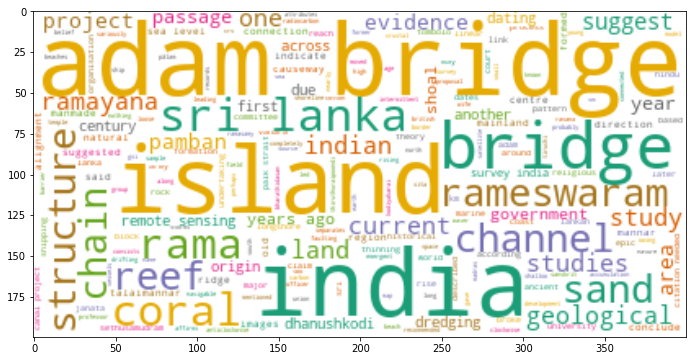

In [29]:
# Create a word cloud from the text

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=42)
wc.generate(" ".join(text))

plt.rcParams['figure.figsize'] = [16, 6]
plt.imshow(wc, interpolation="bilinear")
plt.show()

